# calculate ice flux using the continuity eqn. and input datasets
### Inputs
- Ice thickness
- Ice velocity
- Hypsometry
- Height change
- Flowline-width

In [2]:
import numpy as np
import pandas as pd

path = '/home/pelto/Desktop/ice_flux/Conrad/'

# import all datasets needed for ice flux calculation as pandas dataframes
# dh = pd.read_csv(path + 'conradD_2017.csv')
# dv = pd.read_csv(path + 'conrad_2017.csv')
# area = pd.read_csv(path + 'conrad_2016_hyps.csv')
d = pd.read_csv(path + 'Conrad_ice_flux_data_2017.csv')
rho_ice = 910.    # kg m-3
rho_water = 1000. # kg m-3

### Continuity equation
Mass balance and ice flux are linked via the continuity equation, which implies mass conservation:

### $$\frac{\partial H}{\partial t} = \dot{m} - \nabla \cdot \vec{q},$$

where $H$ is the ice thickness, $\dot{m}$ the mass balance and $\vec{q}$ the ice flux.



### Flowline model
For a flowline model of the glacier, Let $S$ be the area of a cross-section perpendicular to the flowline. It has a width $w$ and a thickness $H$ 

### $$ \frac{\partial S}{\partial t} = w \, \dot{m} - \nabla \cdot q $$

Since we wish to calculate $\dot{m}$, we rearrange the continuity equation:

### $$ \dot{m} = \frac{\frac{\partial S}{\partial t} + \nabla \cdot q}{w} $$

In this case I am taking the bed shape to be rectangular as we are calculating all parameters as averages:

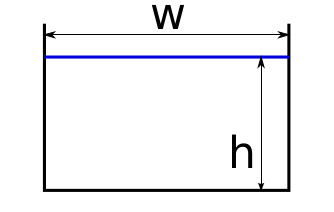

### $$ S = w \times H $$

$H$ is taken as the average ice thickness for an entire 100 m elevation band and $w$ is taken as the average width of that same band.

Ice flux $Q$ along glacier through the flux gate is equal to the depth-integrated ice velocity $u$ multiplied by cross-sectional area:

### $$ q = u \times S  $$

We take the average ice surface ice velocity for an entire 100 m elevation band as $u$.

For a given flowband ice flux is equal to the flux in less the flux out: 
### $$ \nabla \cdot q = q_{in} - q_{out} $$

with the flux out $q_{in}$ equal to $q_{out}$ from the bin immediately up glacier of a given bin. 

Incorporating surface height change from LiDAR data over the band $\frac{\partial h}{\partial t}$:
### $$ \frac{\partial S}{\partial t} = w \times (H + \frac{\partial h}{\partial t})$$ 

Should I add in length to calculate $\frac{\partial S}{\partial t}$ in $m^3$??

In [3]:
w = d['width_mid']   # estimated width of flowline at middle (average) of each flowband (meters)
# H = d['Depth_10m_bins'] # depth is ice thickness from the nearest 10m bin to the flowband bottom
H = d['Depth']          # depth is ice thickness from 100m bins
u = d['v']          # ice velocity in m yr-1, taken from nearest 10m bin to the flowband bottom
dh = d['dh_dt']         # height change in meters 
a = d['area']           # area of each flowband in m2
# v*=0.8

# l = a / w

# dS = w * (H + dh) * l  # m3

for i in range(len(w) - 1):
    Qout = u * w * H               #  ice flux out m3 yr-1

Qin = w * 0.0
for i in range(len(w) - 1):
    Qin[i]  = Qout[i+1]           # ice flux in m3 yr-1

Qnet = Qin - Qout                 # net ice flux m3 yr-1


SMB_m3 = (S + Qnet) # / w)            ## m3 ice
SMB = SMB_m3 / a * rho_ice      # kg m-3

# SMB = SMB_h * (rho_ice/rho_water)           # mass balance as meters water equivalent

# add arrays to dataframe
# d['dS'] = dS
d['Qin']   = Qin
d['Qout']  = Qout
d['Qnet']  = Qnet
# d['SMB_h'] = SMB_h
d['SMB']   = SMB

In [4]:
d

,Unnamed: 0,Zbins,area,Depth,Depth_10m_bins,width_mid,dh_dt,width_bottom,v_all_yrs,v_10m,v,Qin,Qout,Qnet,SMB
0,0,1850,15760,7.406007,6,152,-8.455444,0,6.8,4.89,6.918675,4.791623e+04,7.788444e+03,4.012778e+04,1362.035335
1,1,1950,66712,18.354733,16,390,-5.414185,300,11.9,9.75,6.693757,6.048609e+05,4.791623e+04,5.569447e+05,19373.028337
2,2,2050,281224,55.436092,46,875,-3.254639,630,15.4,19.14,12.469668,3.364795e+06,6.048609e+05,2.759935e+06,56415.869595
3,3,2150,666295,114.374916,114,1210,-2.612305,1085,24.0,18.89,24.313222,4.940062e+06,3.364795e+06,1.575267e+06,103855.415172
4,4,2250,704649,103.490450,86,1950,-2.250000,1550,28.1,28.98,24.479219,7.843689e+06,4.940062e+06,2.903626e+06,95878.619823
5,5,2350,1177061,157.064210,140,2600,-1.290283,2325,23.1,24.93,19.207453,1.481467e+07,7.843689e+06,6.970981e+06,147143.622856
6,6,2450,1802625,152.399700,130,4280,-1.128418,3550,25.1,24.82,22.712457,4.887169e+06,1.481467e+07,-9.927502e+06,132645.271676
7,7,2550,1157093,51.288280,48,5990,-0.950439,5750,17.5,19.66,15.907883,5.007456e+06,4.887169e+06,1.202876e+05,45902.035538
8,8,2650,1235522,51.639114,47,5810,-0.931396,6050,21.8,28.18,16.690228,4.644381e+06,5.007456e+06,-3.630754e+05,45876.606713
9,9,2750,1033550,61.914806,63,5530,-1.082031,5920,14.8,24.75,13.564638,5.119819e+06,4.644381e+06,4.754381e+05,55776.429554


In [5]:
w = d['width_bottom']   # estimated width of flowline at bottom of flowband boundary (meters)
# H = d['Depth_10m_bins'] # depth is ice thickness from the nearest 10m bin to the flowband bottom
H = d['Depth']          # depth is ice thickness from 100m bins
u = d['v']          # ice velcotiy in m yr-1, taken from nearest 10m bin to the flowband bottom
dh = d['dh_dt']         # height change in meters 
a = d['area']           # area of each flowband in m2
# v*=0.8

for i in range(len(w) - 1):
    Qout = w * H * u              #  flux out m3 yr-1

Qin = a * 0.0
for i in range(len(w) - 1):
    
    Qin[i]  = Qout[i+1]           # flux in m3 yr-1

dh_V = dh * a                     # m3 ice volume

Qnet = Qin - Qout                 # net flux m3 yr-1

SMB_V = Qnet + dh_V                         # mass balance as a volume of ice (m3)
SMB_h = SMB_V / a                           # mass balance as a thickness (meters)
SMB = SMB_h * (rho_ice/rho_water)           # mass balance as meters water equivalent

# add arrays to dataframe
d['dh_V']  = dh_V
d['Qin']   = Qin
d['Qout']  = Qout
d['Qnet']  = Qnet
d['SMB_h'] = SMB_h
d['SMB']   = SMB

In [6]:
d

,Unnamed: 0,Zbins,area,Depth,Depth_10m_bins,width_mid,dh_dt,width_bottom,v_all_yrs,v_10m,v,Qin,Qout,Qnet,SMB
0,0,1850,15760,7.406007,6,152,-8.455444,0,6.8,4.89,6.918675,4.791623e+04,7.788444e+03,4.012778e+04,1362.035335
1,1,1950,66712,18.354733,16,390,-5.414185,300,11.9,9.75,6.693757,6.048609e+05,4.791623e+04,5.569447e+05,19373.028337
2,2,2050,281224,55.436092,46,875,-3.254639,630,15.4,19.14,12.469668,3.364795e+06,6.048609e+05,2.759935e+06,56415.869595
3,3,2150,666295,114.374916,114,1210,-2.612305,1085,24.0,18.89,24.313222,4.940062e+06,3.364795e+06,1.575267e+06,103855.415172
4,4,2250,704649,103.490450,86,1950,-2.250000,1550,28.1,28.98,24.479219,7.843689e+06,4.940062e+06,2.903626e+06,95878.619823
5,5,2350,1177061,157.064210,140,2600,-1.290283,2325,23.1,24.93,19.207453,1.481467e+07,7.843689e+06,6.970981e+06,147143.622856
6,6,2450,1802625,152.399700,130,4280,-1.128418,3550,25.1,24.82,22.712457,4.887169e+06,1.481467e+07,-9.927502e+06,132645.271676
7,7,2550,1157093,51.288280,48,5990,-0.950439,5750,17.5,19.66,15.907883,5.007456e+06,4.887169e+06,1.202876e+05,45902.035538
8,8,2650,1235522,51.639114,47,5810,-0.931396,6050,21.8,28.18,16.690228,4.644381e+06,5.007456e+06,-3.630754e+05,45876.606713
9,9,2750,1033550,61.914806,63,5530,-1.082031,5920,14.8,24.75,13.564638,5.119819e+06,4.644381e+06,4.754381e+05,55776.429554
